In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import rasterio as rio

# Output file parameters
nldas3_dir = '../data/ubrb_nldas3/'
nldas3_filebase = 'nldas3_UBRB_subset_'
nldas3_fileext = '.nc'

In [4]:
nldas3_ubrb_ds = xr.open_mfdataset(nldas3_dir+nldas3_filebase+'*'+nldas3_fileext, combine='by_coords')
nldas3_ubrb_ds

<xarray.Dataset> Size: 610MB
Dimensions:      (time: 1464, lat: 88, lon: 148)
Coordinates:
  * lon          (lon) float32 592B -116.1 -116.1 -116.1 ... -114.6 -114.6
  * lat          (lat) float32 352B 43.22 43.24 43.24 43.26 ... 44.08 44.08 44.1
  * time         (time) datetime64[ns] 12kB 2010-05-01 ... 2010-06-30T23:00:00
Data variables:
    spatial_ref  (time) int64 12kB 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    Tair         (time, lat, lon) float32 76MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    Qair         (time, lat, lon) float32 76MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    PSurf        (time, lat, lon) float32 76MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    LWdown       (time, lat, lon) float32 76MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    SWdown       (time, lat, lon) float32 76MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    Wind_N       (time, lat, lon) float32 76MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    Wind_E       (time, lat, lon) float32 76MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    Rainf        (time, lat, lon) float32 76MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
Attributes: (12/17)
    missing_value:          -9999.0
    time_definition:        hourly
    shortname:              NLDAS_FOR0010_H_3.0
    title:                  NLDAS Forcing Data L4 Hourly 0.01 x 0.01 degree V...
    version:                3.0 beta
    institution:            NASA GSFC
    ...                     ...
    websites:               https://ldas.gsfc.nasa.gov/nldas/v3/ ; https://li...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  7.005
    SOUTH_WEST_CORNER_LON:  -168.995
    DX:                     0.01
    DY:                     0.01

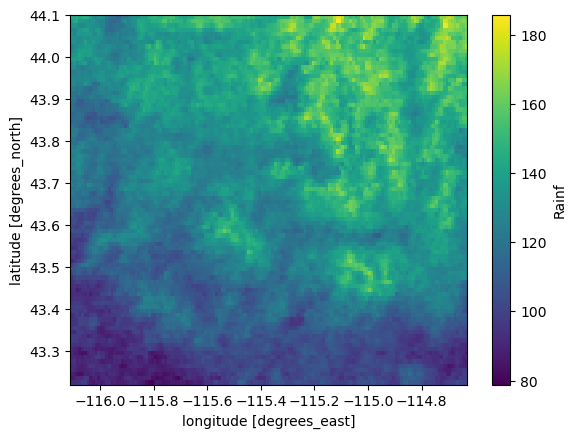

In [5]:
nldas3_ubrb_ds['Rainf'].sum(dim='time').plot()

In [7]:
ar_ds = nldas3_ubrb_ds.sel(time=slice('2010-06-02','2010-06-04'))
ar_ds

<xarray.Dataset> Size: 30MB
Dimensions:      (time: 72, lat: 88, lon: 148)
Coordinates:
  * lon          (lon) float32 592B -116.1 -116.1 -116.1 ... -114.6 -114.6
  * lat          (lat) float32 352B 43.22 43.24 43.24 43.26 ... 44.08 44.08 44.1
  * time         (time) datetime64[ns] 576B 2010-06-02 ... 2010-06-04T23:00:00
Data variables:
    spatial_ref  (time) int64 576B 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    Tair         (time, lat, lon) float32 4MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    Qair         (time, lat, lon) float32 4MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    PSurf        (time, lat, lon) float32 4MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    LWdown       (time, lat, lon) float32 4MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    SWdown       (time, lat, lon) float32 4MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    Wind_N       (time, lat, lon) float32 4MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    Wind_E       (time, lat, lon) float32 4MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
    Rainf        (time, lat, lon) float32 4MB dask.array<chunksize=(24, 88, 148), meta=np.ndarray>
Attributes: (12/17)
    missing_value:          -9999.0
    time_definition:        hourly
    shortname:              NLDAS_FOR0010_H_3.0
    title:                  NLDAS Forcing Data L4 Hourly 0.01 x 0.01 degree V...
    version:                3.0 beta
    institution:            NASA GSFC
    ...                     ...
    websites:               https://ldas.gsfc.nasa.gov/nldas/v3/ ; https://li...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  7.005
    SOUTH_WEST_CORNER_LON:  -168.995
    DX:                     0.01
    DY:                     0.01

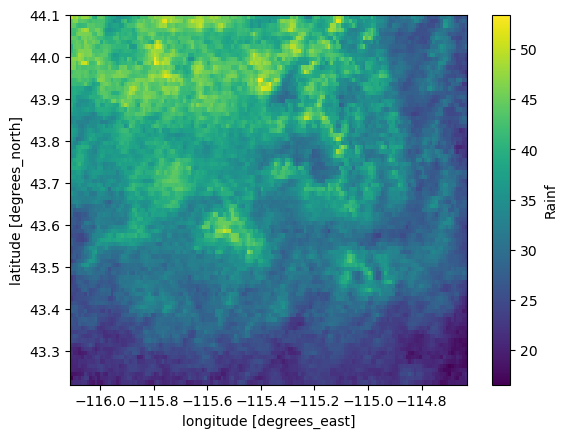

In [8]:
ar_ds['Rainf'].sum(dim='time').plot()

In [10]:
ar_before_ds = nldas3_ubrb_ds.sel(time=slice('2010-05-01','2010-06-01'))
ar_after_ds = nldas3_ubrb_ds.sel(time=slice('2010-06-05','2010-06-30'))

prcp_no_ar = ar_before_ds['Rainf'].sum(dim='time') + ar_after_ds['Rainf'].sum(dim='time')

In [11]:
type(prcp_no_ar)

xarray.core.dataarray.DataArray

In [12]:
prcp_ar = ar_ds['Rainf'].sum(dim='time')

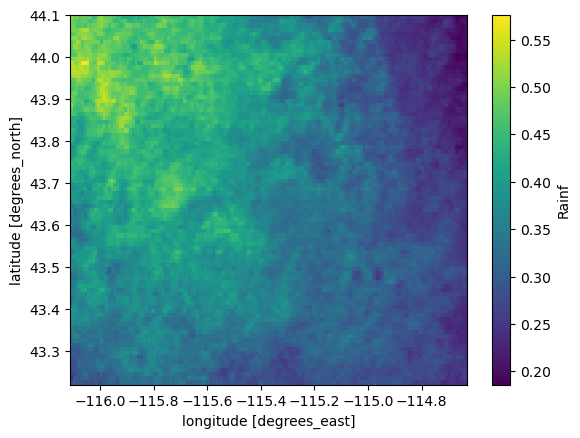

In [13]:
ar_frac = prcp_ar / prcp_no_ar

ar_frac.plot()